In [1]:
import csv
import numpy as np
import matplotlib.pyplot as plt
 

In [2]:
# Based on record check, increment count by year
def red_year_total(redaction_year):
    '''
    Maintains a dictionary of counts by year passed when called
    
    Assumes that each call corresponds with a single record
    in the EMS dispatch data set, so a call with input of '2019'
    means, add 1 to the 2019 total of redacted records
    '''
    # each dictionary entry value is a 2 element list, first element YTD total calls, second element YTD redacted calls
    call_total = total_calls.get(redaction_year)
    ytd = call_total[1]  + 1 
    total_calls[redaction_year] = [call_total[0], ytd] 
   

In [3]:
def write_redacted_rec_to_log(ems_rec):
    '''
    Extract record ID and write to log file specific in global dict
    '''   
    call_id = ems_rec['_id'] 
    log_file[call_id] = call_id
   

In [4]:
# Based on record check, increment count by year
def year_total(redaction_year):
    '''
    Maintains a dictionary of counts by year passed when called
    
    Assumes that each call corresponds with a single record
    in the EMS dispatch data set, so a call with input of '2019'
    means, add 1 to the 2019 total of redacted records
    '''
    # each dictionary entry value is a 2 element list, first element YTD total calls, second element YTD redacted calls
    # need to initialize dictionary value if key is not found
    call_total = total_calls.get(redaction_year,0)
    if call_total == 0:
        total_calls[redaction_year] = [1,0]
    else: 
        ytd = call_total[0]  + 1 
        total_calls[redaction_year] = [ytd, call_total[1]] 
  

In [5]:
def test_for_redacted_description(ems_rec):
    '''
    Examine EMS dispatch record and look for redacted or blank
    descriptions
    '''         
    #print(ems_rec['call_id_hash'])
    # add 1 to total of all calls per year. 
    call_year = ems_rec['call_year']
    year_total(call_year)
    if ems_rec['description_short'] == 'Removed':
            write_redacted_rec_to_log(ems_rec)
            red_year_total(call_year)

In [6]:
def iterate_EMS_records(file_path):
    '''
    Retrieve each record from a CSV of EMS records from the filepath
    
    Intended for use with the WPRDC's record of EMS dispatches
    in Allegheny County and will provide a dictionary of each record
    for use by processing functions
    '''
    file = open(file_path, newline='')
    reader = csv.DictReader(file)

    for row in reader:
        #print(row)
        test_for_redacted_description(row)

In [7]:
def output_EMS_records(file_path):
    '''
    Write each record to a text file from dictionary of log_file records to the filepath. 
         
       
    '''
    header = ['_id']
    #print('log_file_keys',keys)
    try:
        with open(file_path, 'w', newline='') as file:
            csvwriter = csv.writer(file)
            csvwriter.writerow(header)
            for row in log_file:
                #print(row)
                csvwriter.writerow([row])
    except IOError:
        print("I/O Error on write of CVS log_file")

In [8]:
def display_redaction_count_by_year(year_counts):
    '''
    Given a dictionary of year(key):['total','redactions']
    make a pretty output to the console
    '''
    

In [9]:
#main code
#create empty dictionaries
total_calls = {}
log_file = {}

#read file
#iterate_EMS_records('data/ac_ems_300records.csv') 
iterate_EMS_records('data/EMS_dispatch_data.csv') 



In [10]:
#sort the dictionary

sorted_total_calls = {}

for i in sorted(total_calls):
    sorted_total_calls[i] = total_calls[i]


In [11]:
#create values for graphs
names = list(sorted_total_calls.keys())
values = list(sorted_total_calls.values())
y_pos = np.arange(len(names))

#redacted calls are the second number in the list per key
redact_list =[]
for x in range(0,len(values)):
    redact_list.append(values[x][1])

#total calls are the first number in the list per key
total_list =[]
for x in range(0,len(values)):
    total_list.append(values[x][0])
    
per_list = []    
for x in range(0,len(values)):
    percent = round(((values[x][1] / values[x][0])*100), 2)
    per_list.append(percent)
    
#print('redact_list', redact_list)    
#print('total_list', total_list)    
#print('per_list', per_list)    

In [12]:
##write log to csv file

output_EMS_records('data/EMS_log_file.txt')

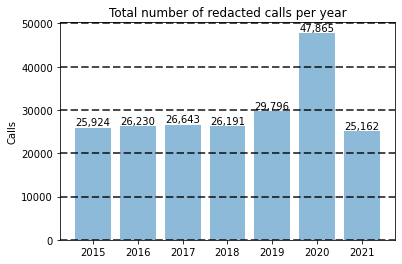

In [13]:
#graph redacted calls

bar1 = plt.bar(y_pos, redact_list, align='center', alpha=0.5)
plt.grid(color='black', linestyle='--', linewidth=2, axis='y', alpha=0.7)
plt.xticks(y_pos, names)
plt.ylabel('Calls')
plt.title('Total number of redacted calls per year')
#add text to top of bar
for bar in bar1:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height,
             f'{height:,.0f}',
             ha='center',
             va='bottom')
plt.show()

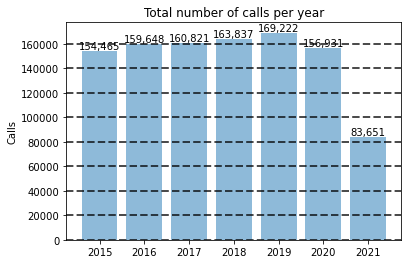

In [14]:
#graph total calls

bar1 = plt.bar(y_pos, total_list, align='center', alpha=0.5)
plt.grid(color='black', linestyle='--', linewidth=2, axis='y', alpha=0.7)
plt.xticks(y_pos, names)
plt.ylabel('Calls')
plt.title('Total number of calls per year')
#add text to top of bar
for bar in bar1:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height,
             f'{height:,.0f}',
             ha='center',
             va='bottom')
plt.show()

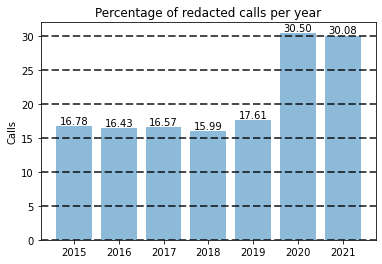

In [15]:
#graph percent of redacted calls

percent_gr = plt.bar(y_pos, per_list, align='center', alpha=0.5)
plt.grid(color='black', linestyle='--', linewidth=2, axis='y', alpha=0.7)
plt.xticks(y_pos, names)
plt.ylabel('Calls')
plt.title('Percentage of redacted calls per year')
#add text to top of bar
for bar in percent_gr:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height,
             f'{height:.2f}',
             ha='center',
             va='bottom')
plt.show()

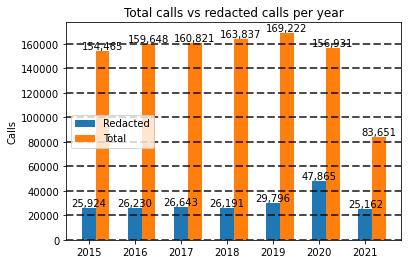

In [16]:
#graph total calls vs redacted calls
width=0.3
legend = ['Redacted','Total']
bar1 = plt.bar(y_pos, redact_list, width=width)
bar2 = plt.bar(y_pos+ width, total_list, width=width)
plt.grid(color='black', linestyle='--', linewidth=2, axis='y', alpha=0.7)
plt.xticks(y_pos, names)
plt.ylabel('Calls')
plt.title('Total calls vs redacted calls per year')
#loc=0 is best position as determined by matplotlib
#i think loc=6 is better
plt.legend(legend,loc=6)
#add text to top of bar
for bar in bar1 + bar2:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height,
             f'{height:,.0f}',
             ha='center',
             va='bottom')
plt.show()